# Домашнее задание 3

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 24 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_3

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Вновь рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i).
\end{equation}

В прошлом задании работа шла с линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$. 

__(а)__ В дополнение к квадратичной функции потерь реализуйте логистическую/сигмоидную: $l(z,y) = \ln (1 + \exp(-yz))$ __(Важно: $y$ должен принимать значения $-1$ или $1$ )__. Выпишите градиент. Является ли новая задача регресии выпуклой? Оцените $L$ для новой функции потерь. 

\begin{equation}
f(w) = \frac{1}{n} \sum\limits_{i=1}^n \ln(1 + \exp(-y_i \cdot (w^Tx_i)) ).
\end{equation}

\begin{equation}
grad f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{(- y_i \cdot x_i)\exp(-y_i \cdot (w^Tx_i))}{1 + \exp(-y_i \cdot (w^Tx_i))}
\end{equation}

\begin{equation}
grad f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{- y_i \cdot x_i}{1 + \exp(y_i \cdot (w^Tx_i))}
\end{equation}

\begin{equation}
hessian f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{y_i^2 \cdot x_i x_i^T}{(1 + \exp(y_i \cdot (w^Tx_i)))^2} \exp(y_i \cdot (w^T x_i))
\end{equation}


Моя оценка:
$$
L \geq \lambda_{max} \left( \frac{1}{4n} \sum\limits_{i=1}^n x_i x_i^T \right)

$$

__(б)__ Возьмите датасет _mushrooms_ из прошлого задания. Проделайте следующие шаги из прошлого задания, только с логистической функцией потерь:

1) Разделите данные на две части: обучающую и тестовую.

2) Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации.

3) Используя градиентный спуск, обучите новую модель (без ограничений и регуляризаций). Постройте график: точность от номера итерации.

4) Если в пункте 3) пришлось столкнуться с проблемами или просто необходимо улучшить точность, то добавьте ограничения или $\ell_2$-регуляризацию, как в прошлом ДЗ.

5) Сравните с результатами квадратичной функции потерь из прошлого ДЗ.

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [3]:
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
print(X.shape, y.shape)

(8124, 112) (8124,)


In [4]:
y = y*2 - 3
print(y)

[-1.  1.  1. ...  1. -1.  1.]


#### 1. Разделите данные на две части: обучающую и тестовую.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 2. Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации.

In [6]:
hessian = np.zeros((d, d))

for a, b in zip(X_train[:], y_train):
    hessian = hessian + 1/n  * np.outer(a, a)

hessian = hessian / 4
L = np.linalg.norm(hessian, 2)

In [7]:
print("Константа Липшица:", L)

Константа Липшица: 2.070420431003113


## Вывод: 
Константа Липшица получилась равна 2.07

#### 3. Используя градиентный спуск, обучите новую модель (без ограничений и регуляризаций). Постройте график: точность от номера итерации.

In [8]:
from importlib import reload
import HW_3
reload(HW_3)
from HW_3 import MyLogisticRegression

In [9]:
def func_draw_error_accuracy(step, model):
    
    fig, ax = plt.subplots(figsize=(12,9))
    y = np.array(model.get_errors())
    x = np.linspace(step, step * len(y), len(y))

    ax.set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) ||$)")
    ax.plot(x, np.log(y))

    ax.set_xlabel("Номер итерации")
    ax.set_ylabel("Логарифм ошибки")



    fig, ax = plt.subplots(figsize=(12,9))

    y = np.array(model.get_accuracy())
    x = np.linspace(step, step*len(y), len(y))

    ax.set_title("Точность предсказания от номера итерациии")
    ax.plot(x, y)

    ax.set_xlabel("Номер итерации")
    ax.set_ylabel("Точность")

In [10]:
step = 100
iter = 10e4
eps = 10e-3
linear_model = MyLogisticRegression()
linear_model.fit(X_train, y_train, iter=iter, eps=eps, step=step)

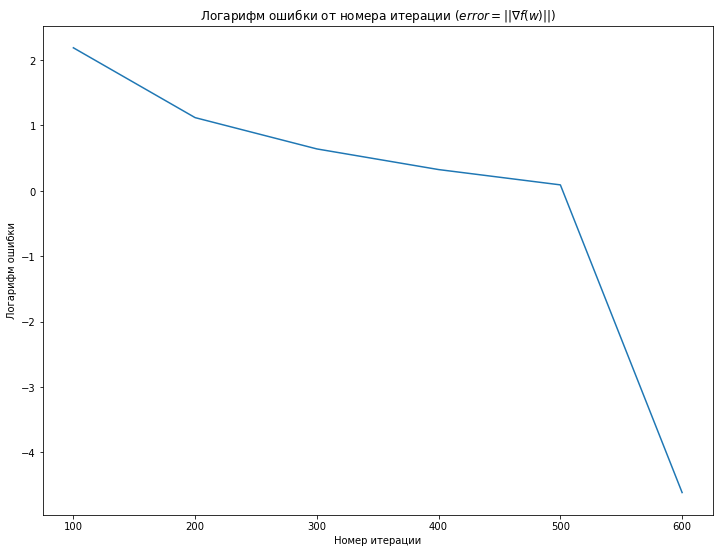

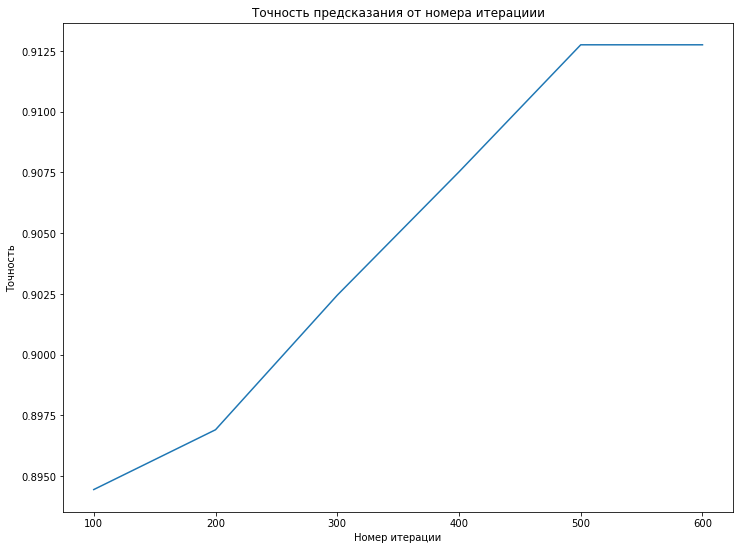

In [11]:
func_draw_error_accuracy(step, linear_model)

In [12]:
y_pred = linear_model.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.9101538461538462


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  1.0


#### 4. Если в пункте 3) пришлось столкнуться с проблемами или просто необходимо улучшить точность, то добавьте ограничения или $\ell_2$-регуляризацию, как в прошлом ДЗ.

In [15]:
step = 100
iter = 10e4
eps = 5*10e-4
l2_coef = 0.05
linear_model_l2 = MyLogisticRegression()
linear_model_l2.fit(X_train, y_train, eps=eps, iter=10e4, l2=True, step=step, l2_coef=l2_coef)

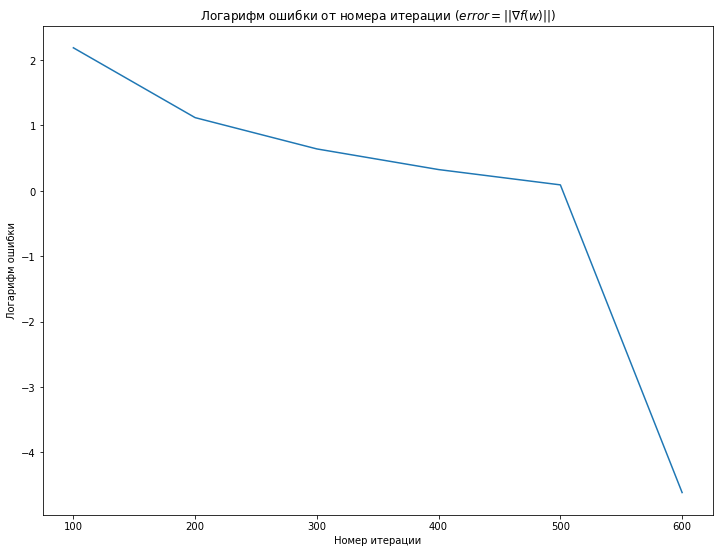

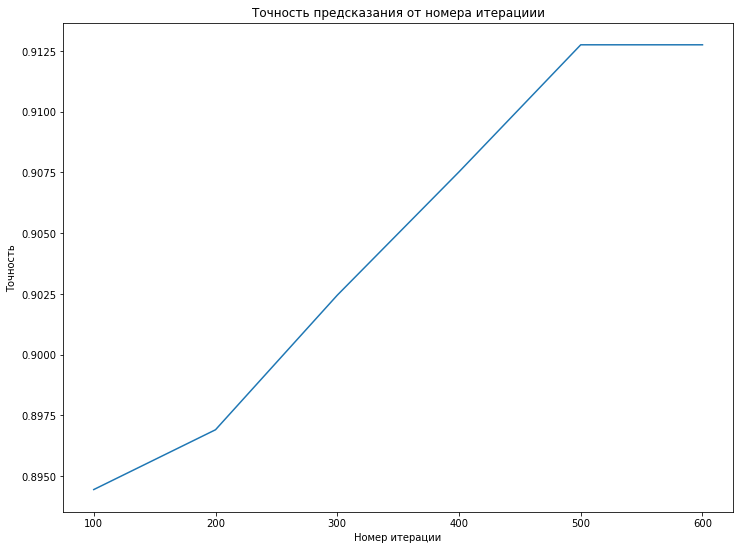

In [16]:
func_draw_error_accuracy(step, linear_model)

In [17]:
y_pred1 = linear_model.predict(X_test)
y_pred2 = linear_model_l2.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(accuracy_score(y_test, y_pred2))

0.9101538461538462
0.8984615384615384


#### 5. Сравните с результатами квадратичной функции потерь из прошлого ДЗ.

In [18]:
from importlib import reload
import HW_3
reload(HW_3)
from HW_3 import MyLinearRegression

In [19]:
step = 10
iter = 10e5
eps = 5*10e-4
linear_model_reg = MyLinearRegression()

linear_model_reg.fit(X_train, y_train, iter=iter, eps=eps, step=step)

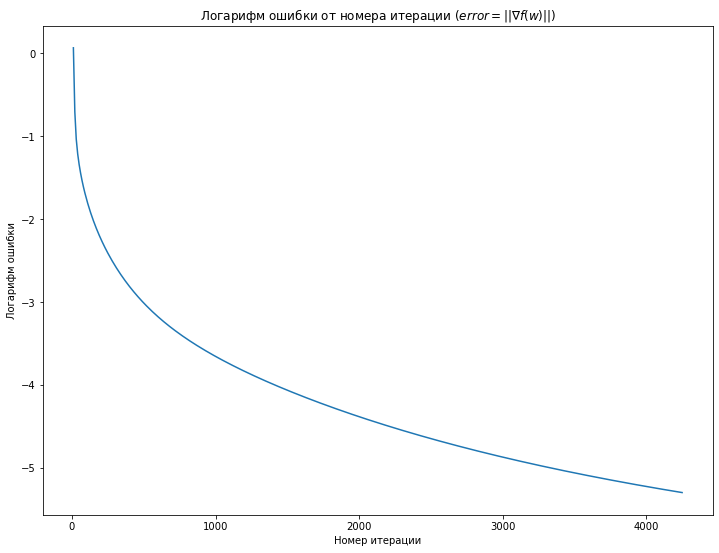

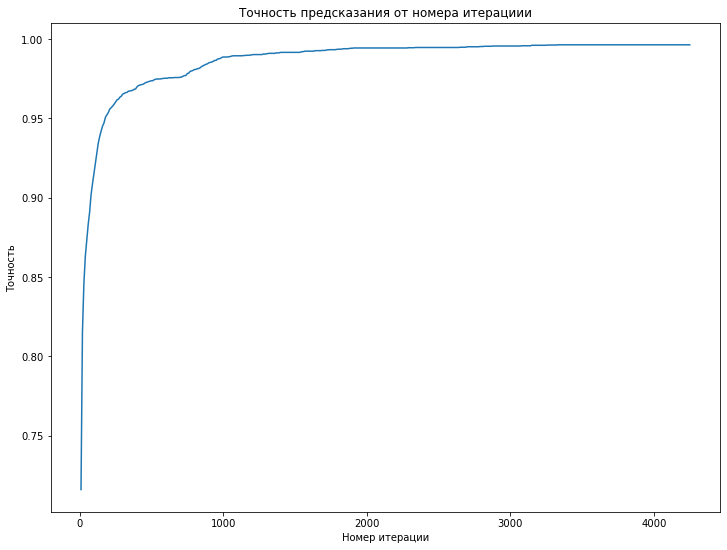

In [20]:
func_draw_error_accuracy(step, linear_model_reg)

In [21]:
print(accuracy_score(y_test, linear_model_reg.predict(X_test)))

1.0


## Задача 2

__(a)__ Реализуйте метод тяжелого шарика. 

In [22]:
from importlib import reload
import HW_3
reload(HW_3)
from HW_3 import MyLogisticRegression

In [23]:
step = 50
iter = 10e5
eps = 5*10e-4
linear_model_heavy = MyLogisticRegression()

linear_model_heavy.fit(X_train, y_train, iter=iter, eps=eps, step=step, heavy_ball=True, alpha=0.95, beta=0.05)

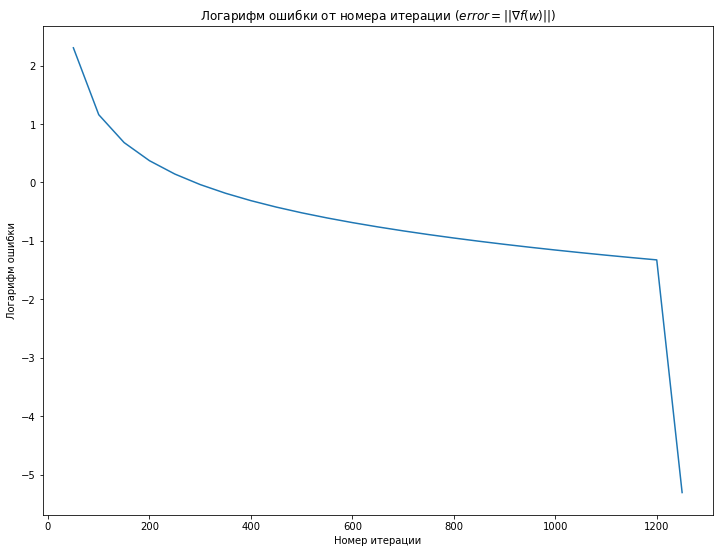

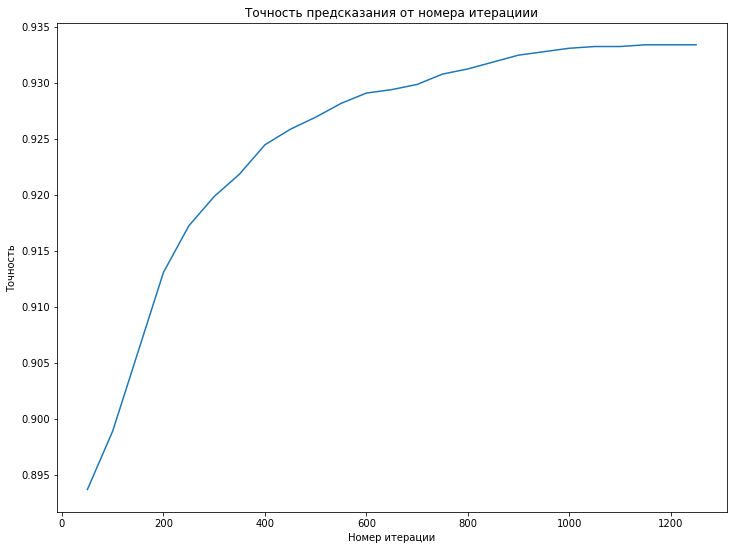

In [24]:
func_draw_error_accuracy(step, linear_model_heavy)

In [ ]:
print(accuracy_score(y_test, linear_model_heavy.predict(X_test)))

__(б)__ Решите задачу логистической регрессии с помощью метода тяжелого шарика (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

In [25]:
alphas = [0.25, 0.5, 0.9, 0.99]
betas = [0.1, 0.2, 0.3, 0.4]
step = 50
iter = 10e5
eps = 5*10e-4
errors = []
accuracy = []
parameters = []
alpha = 0.9
#for alpha in alphas:
for beta in betas:
    lin_mod = MyLogisticRegression()
    lin_mod.fit(X_train, y_train, iter=iter, eps=eps, step=step, heavy_ball=True, alpha=alpha, beta=beta)
    parameters.append((alpha, beta))
    errors.append(lin_mod.get_errors())
    accuracy.append(lin_mod.get_accuracy())
    print(accuracy_score(y_test, lin_mod.predict(X_test)))

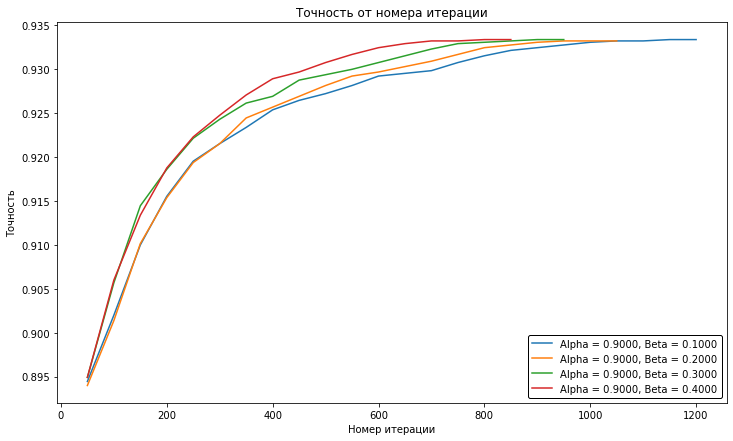

In [46]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.set_title("Точность от номера итерации")

for i in range(len(accuracy)): 
    # Рисуем
    y = accuracy[i]
    x = np.linspace(step, step * len(y), len(y))
    ax.plot(x, y, label='Alpha = %.4f, Beta = %.4f' % (alpha, parameters[i][1]))

ax.set_xlabel("Номер итерации")
ax.set_ylabel("Точность")

legend_box = ax.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

__(в)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте на этот же график сходимость градиентного спуска с шагом $\frac{1}{L}$. Сделайте вывод.

In [27]:
linear_model_moment = lin_mod = MyLogisticRegression()
    lin_mod.fit(X_train, y_train, iter=iter, eps=eps, step=step, heavy_ball=True, alpha=alpha, beta=beta)
#ответ

__(г)__ Если в пунктах (б) и (в) столкнулись с проблемами, попробуйте $\ell_2$-регуляризовать задачу или рассмотреть ее на ограниченном множестве.

In [28]:
#ответ

__(д)__ Реализуйте ускоренный метод Нестерова (в форме Нестерова, а не который доказывали на семинаре). 

In [29]:
from importlib import reload
import HW_3
reload(HW_3)
from HW_3 import MyLogisticRegression

In [30]:
step = 50
iter = 10e5
eps = 5*10e-4
linear_model_nesterov = MyLogisticRegression()

linear_model_nesterov.fit(X_train, y_train, iter=iter, eps=eps, step=step, nesterov_moment=True, alpha=0.95, beta=0.05)

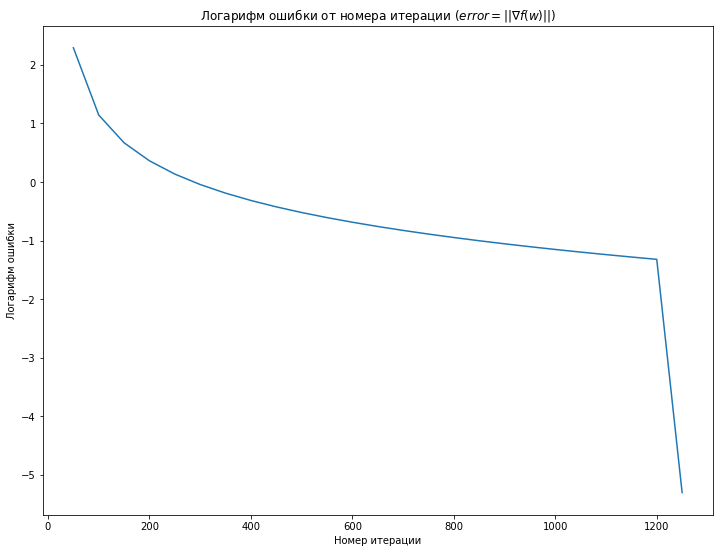

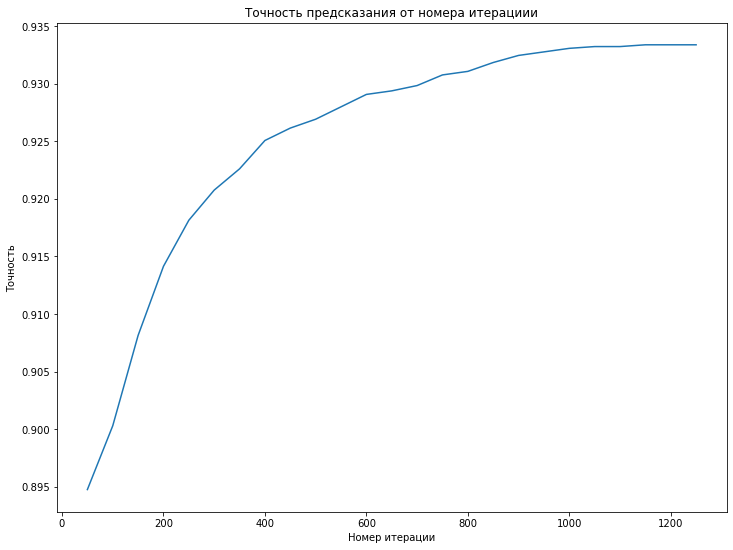

In [31]:
func_draw_error_accuracy(step, linear_model_nesterov)

In [32]:
y_pred = linear_model_nesterov.predict(X_test)
y_prob = linear_model_nesterov.prob(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.9341538461538461


Text(0.5, 0, 'Метка')

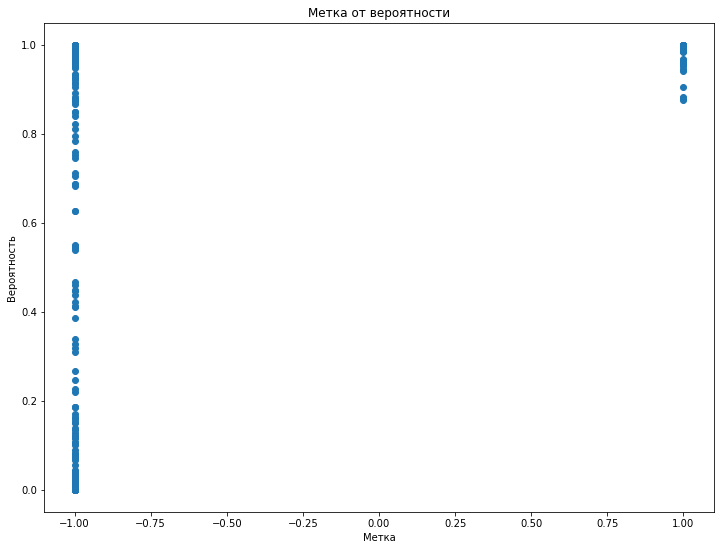

In [33]:
fig, ax = plt.subplots(figsize=(12,9))
y = y_test
x = y_prob

ax.set_title("Метка от вероятности")

ax.scatter(y, x)
ax.set_ylabel("Вероятность")
ax.set_xlabel("Метка")

__(е)__ Решите задачу логистической регресии с помощью метода Нестерова (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Проверьте также значения моментума равные $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ - номер итерации), а если решаете сильно выпуклую задачу, то и $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

In [34]:
#ответ

__(ж)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте этот график к графикам для тяжелого шарика и градиентного спуска из пункта (г). Сделайте итоговый вывод.

In [35]:
#ответ

__Бонусные пункт__

__(з)__ Сделаем подбор константы $L$ адаптивным. Как упоминалось на семинаре, можно измерять локальную $L$, используя:
$$
f(y) \leq f(x^k) + \langle \nabla f(x^k), y - x^k \rangle + \frac{L}{2}\|x^k - y\|_2^2
$$
В частности, может подойти процедура:

```python
def backtracking_L(f, grad, x, h, L0, rho):
    L = L0
    fx = f(x)
    gradx = grad(x)
    while True:
        y = x - 1 / L * h
        if f(y) <= fx - 1 / L gradx.dot(h) + 1 / (2 * L) h.dot(h):
            break
        else:
            L = L * rho
    return L
```

Каким стоит взять __h__? __rho__ должно быть больше или меньше 1? __L0__ надо брать заведомо большим или маленьким?

In [36]:
#ответ

__(и)__ Поэксперементируйте с этой процедурой, встроенной в подбор $L$ для шага градиентного спуска. В качестве задачи продолжайте рассматривать логистическую регрессию из Задачи 1. Аналогично встройте процедуру подбора $L$ в метод тяжелого шарика и ускоренный метод Нестерова. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно). Отобразите на этом графике градиентный спуск, тяжелый шарик и метод Нестерова с адаптивным шагом и шагом $\frac{1}{L}$ (всего 6 линий на графике). Сделайте вывод.

In [37]:
#ответ

__(к)__ Постройте аналогичный пункту (и) график точности модели от времени.

In [38]:
#ответ

__(л)__ В [работе](https://arxiv.org/pdf/1204.3982.pdf) представлена техника рестартов для подавления немонотонной сходимости Алгоритма 2 (метод Нестерова). Попробуйте повторить эксперименты авторов на $\ell_2$-регуляризованной квадратичной или логистической регресии. Возьмите параметр регуляризации $\lambda = L / 100$.

In [39]:
#ответ